In [2]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from matplotlib.pyplot import figure

In [3]:
#centers = [[11,7.5],[17,12.5]]
#centers = [[10,17.5],[14,10],[18,2.5]]
centers = [[11,5],[14,10],[17,16]]
X, _ = make_blobs(n_samples = 20, centers = centers, cluster_std = 1.7)

In [4]:
##Getting co-ordinates of one car
from firebase import firebase
firebase = firebase.FirebaseApplication('https://ambu-b65bb.firebaseio.com/', None)
carx = firebase.get('/car/231427/location/lat', None)
cary = firebase.get('/car/231427/location/lon', None)
carid = firebase.get('/car', None)
cid = list(carid)
print(cid[0])
print(carx)
print(cary)
X = np.append(X,[np.array([carx,cary])],axis=0)

225364
18
7.5


In [5]:
## Getting the co-ordinates of ERV
from firebase import firebase
firebase = firebase.FirebaseApplication('https://ambu-b65bb.firebaseio.com/', None)
erv_dest_x = firebase.get('/Ambulance/154068/destination/lat', None)
erv_dest_y = firebase.get('/Ambulance/154068/destination/lon', None)
print(erv_dest_x)
print(erv_dest_y)

14
12.5


[18.   7.5]


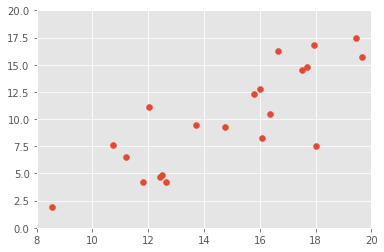

In [6]:
plt.scatter(X[:,0],X[:,1])
print(X[20])
#plt.plot([14,14],[0,20],color="black")
plt.ylim(0,20)
plt.xlim(8,20)
plt.show()

In [7]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [8]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[17.58664755 15.07210004]
 [15.81308636 10.00402699]
 [11.88288521  5.34442091]
 [ 8.5632967   1.91882822]]
Number of estimated clusters: 4


In [9]:
colors = 10*['g.','b.','c.','k.','y.','m.']

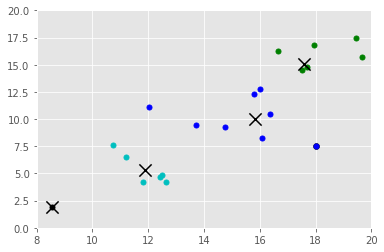

In [10]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)
#plt.plot([14,14],[0,20],color="black")
plt.scatter(carx,cary,color="black")
plt.ylim(0,20)
plt.xlim(8,20)
plt.show()

In [11]:
# count1=0 count2=0 count3=0
count = []
for i in range(n_clusters_):
    count.append(0)
print(count[0]) 

0


In [12]:
# counting the no.of cars in each cluster
for i in range(n_clusters_):
    for j in range(len(X)):
        if(labels[j]==i):
            count[i]=count[i]+1
            
for i in range(n_clusters_):
    print(count[i])

6
8
6
1


In [13]:
highlabel=0;
temp=count[0]
for i in range(n_clusters_):
    if count[i]>temp:
        temp = count[i]
        highlabel=i
print(highlabel)

1


In [14]:
## moving all min(n-1) co-ordinates to max clustered lane

for i in range(len(X)):
    if(labels[i]!=highlabel):
        print("Co-ordinates are :",X[i])

Co-ordinates are : [17.49926357 14.53979952]
Co-ordinates are : [8.5632967  1.91882822]
Co-ordinates are : [12.64711454  4.22418757]
Co-ordinates are : [19.66700659 15.72422141]
Co-ordinates are : [11.83071628  4.197194  ]
Co-ordinates are : [10.72185499  7.61666602]
Co-ordinates are : [19.43116874 17.42414219]
Co-ordinates are : [16.65526886 16.22234718]
Co-ordinates are : [12.49237327  4.82159487]
Co-ordinates are : [12.41793644  4.6949291 ]
Co-ordinates are : [11.18731576  6.51195389]
Co-ordinates are : [17.70145387 14.78296049]
Co-ordinates are : [17.94947515 16.83209272]


In [16]:
'''cc_highlabel = cluster_centers[highlabel]
print(cc_highlabel)         
c=0

for i in range(len(X)):
    if(labels[i]!=highlabel):
        print("Co-ordinates are :",X[i])
    if cc_highlabel>X[i[0]]:'''

'cc_highlabel = cluster_centers[highlabel]\nprint(cc_highlabel)         \nc=0\n\nfor i in range(len(X)):\n    if(labels[i]!=highlabel):\n        print("Co-ordinates are :",X[i])\n    if cc_highlabel>X[i[0]]:'

In [17]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(X)):
    if(labels[i]==0):
        if(X[i][0]<14):
            TP=TP+1
    if(labels[i]==1):
        if(X[i][0]>14):
            TN=TN+1
    if(labels[i]==0):
        if(X[i][0]>14):
            FP=FP+1
    if(labels[i]==1):
        if(X[i][0]<14):
            FN=FN+1
print((TP+TN)/(FP+FN+TP+TN))

0.42857142857142855
